# 1. 피쳐 엔지니어링
## 1) 피쳐 엔지니어링이란 ? 
- 주어진 특성을 조합하여 새로운 특성을 만드는 작업 

## 2) 다중 회귀 
- 여러 개의 특성을 이용해 사용하는 선형 회귀 
-  예시 : $길이 \cdot 높이 + 길이^2 + 높이^2 $
  
  ## 3) 하이퍼파라미터 
  - 머신러닝 알고리즘이 학습하지 않은 파라미터 
  - 인간이 직접 지정 
  - 규제를 위한 alpha 값 

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


# Matplotlib의 전역 폰트 설정
plt.rc('font', family='Pretendard')

# 마이너스 부호가 깨지는 현상 방지
plt.rc('axes', unicode_minus=False)


# 2. 데이터 준비 

## 1) CSV를 데이터 프레임으로 수집
- 사이킷런 1.2 버전 이후 데이터프레임도 호환 
- 데이터 프레임 > 넘파이로 변경 > 크게 차이 없음 

In [23]:
perch_full = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


## 2) 타깃 테이터 생성 

In [24]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 3) 훈련 / 테스트 분리 

In [25]:
train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weight)

## 4) 데이터 전처리 - PolynomialFeatures
- `PolynomialFeatures(include_bias=False)` : 절편을 제외하고 전처리 
  - `fit()` : 새롭게 만들 특성 조합을 찾음 
  - `transform()` : 데이터를 변환  

In [26]:
poly =PolynomialFeatures(include_bias=False)

### 훈련 세트 조합 만들기 
poly.fit(train_input)

### 조합 출력 
train_poly = poly.transform(train_input)

print("42개에서 9개의 특성 추출 : ",train_poly.shape)

### 조합 확인 
print("조합 확인 : ", poly.get_feature_names_out())

42개에서 9개의 특성 추출 :  (42, 9)
조합 확인 :  ['length' ' height' ' width' 'length^2' 'length  height' 'length  width'
 ' height^2' ' height  width' ' width^2']


In [27]:
### 테스트 세트 조합 만들기 
test_poly=poly.transform(test_input)


# 3. 다중 회귀 모델 훈련 
## 1) 회귀 모델 학습

In [28]:
### 객체 선언 
lr = LinearRegression()
lr.fit(train_poly,train_target)

print("모델 평가(훈련) : ", lr.score(train_poly,train_target))
print("모델 평가(검증) : ", lr.score(test_poly,test_target))

모델 평가(훈련) :  0.9906721427318859
모델 평가(검증) :  0.9414221920007683


## 2) 규제
- 모델이 훈련 세트를 너무 과도하게 학습하지 못하게 하여 Overfitting 을 방지 
- 대표적으로 정규화를 가능 
- 대표적인 방식 : 릿지(Ridge - 제곱값) 와 라쏘 (Lasso - 절대값 )

In [32]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

- 릿지 알고리즘 이용 
  - 훈련 점수가 낮아 졌지만 검증 점수가 상승하고 점수가 유사해짐 

In [35]:
ridge = Ridge()
### 릿지로 규제를 주고 학습
ridge.fit(train_scaled, train_target)

print("모델 평가 (훈련): ",ridge.score(train_scaled,train_target))
print("모델 평가 (검증): ",ridge.score(test_scaled,test_target))

모델 평가 (훈련):  0.986190916307391
모델 평가 (검증):  0.9816666142305165


## 3) 릿지의 alpah 값 
- 0.001에서 100까지 늘려가며 확인 

In [36]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score=[]
test_score=[]

for a in alpha_list : 
    ridge = Ridge(alpha=a)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

- 시각화 
  - 오버피팅과 언더피팅이 없는 알파값 : 0.01

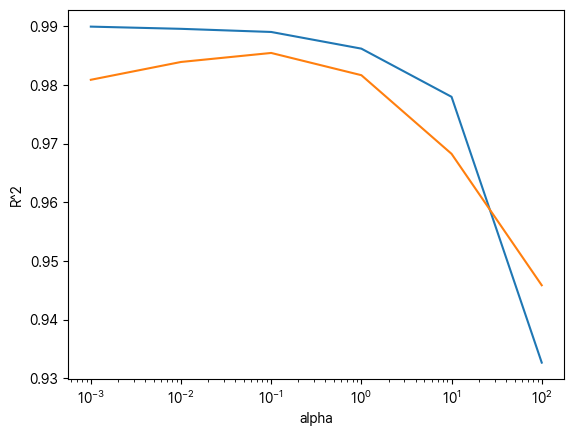

In [37]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

- 알파값을 변경해서 적용 

In [38]:
ridge = Ridge(alpha=0.1)
### 릿지로 규제를 주고 학습
ridge.fit(train_scaled, train_target)

print("모델 평가 (훈련): ",ridge.score(train_scaled,train_target))
print("모델 평가 (검증): ",ridge.score(test_scaled,test_target))

모델 평가 (훈련):  0.989032058813466
모델 평가 (검증):  0.9854558024500837


## 4) 라쏘의 alpha값 
- 적정 값 : 0.01

c:\ProgramData\miniconda3\envs\ml_basic\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.317e+04, tolerance: 4.924e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\miniconda3\envs\ml_basic\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.813e+03, tolerance: 4.924e+02
  model = cd_fast.enet_coordinate_descent(


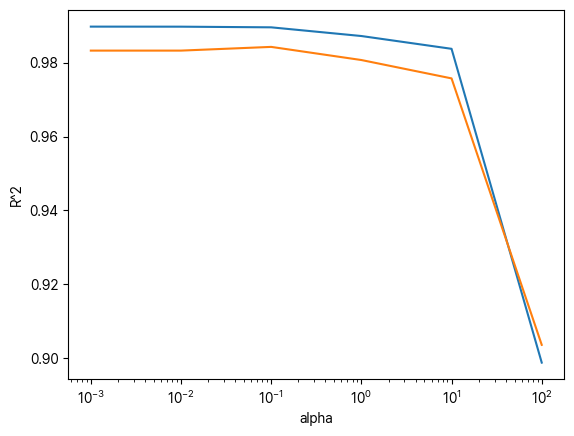

In [40]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score=[]
test_score=[]

for a in alpha_list : 
    lasso = Lasso(alpha=a,max_iter=10000)
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

In [41]:
lasso = Lasso(alpha=0.1)
### 릿지로 규제를 주고 학습
lasso.fit(train_scaled, train_target)

print("모델 평가 (훈련): ",lasso.score(train_scaled,train_target))
print("모델 평가 (검증): ",lasso.score(test_scaled,test_target))

모델 평가 (훈련):  0.9891492329070228
모델 평가 (검증):  0.9836604442331568


c:\ProgramData\miniconda3\envs\ml_basic\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.273e+03, tolerance: 4.924e+02
  model = cd_fast.enet_coordinate_descent(
